Diabetes prediction system using machine learning algorithm 
1. Support Vector Machine
2. Random forest classifier
3. Logistic Regression
4. Decision Tree
5. Naive Bayes
6. KNN



In [ ]:
#importing the requires libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



**LOAD THE DATASET**

In [ ]:
df=pd.read_csv("/content/heart (1).csv")

**explore the dataset**

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
df.shape

(1025, 14)

In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
print("No. of zeroes value in age ", df[df['age'] == 0].shape[0])

No. of zeroes value in age  0


In [ ]:
print("No. of zeroes value in sex", df[df['sex'] == 0].shape[0])

No. of zeroes value in sex 312


In [ ]:
print("No. of zeroes value in cp", df[df['cp'] == 0].shape[0])

No. of zeroes value in cp 497


In [ ]:
print("No. of zeroes value in trestbps", df[df['trestbps'] == 0].shape[0])

No. of zeroes value in trestbps 0


In [ ]:
print("No. of zeroes value in chol", df[df['chol'] == 0].shape[0])

No. of zeroes value in chol 0


In [ ]:
print("No. of zeroes value in fbs", df[df['fbs'] == 0].shape[0])

No. of zeroes value in fbs 872


In [ ]:
print("No. of zeroes value in restecg", df[df['restecg'] == 0].shape[0])

No. of zeroes value in restecg 497


In [ ]:
print("No. of zeroes value in thalach", df[df['thalach'] == 0].shape[0])

No. of zeroes value in thalach 0


In [ ]:
print("No. of zeroes value in exang", df[df['exang'] == 0].shape[0])

No. of zeroes value in exang 680


In [ ]:
print("No. of zeroes value in oldpeak", df[df['oldpeak'] == 0].shape[0])

No. of zeroes value in oldpeak 329


In [ ]:
print("No. of zeroes value in slope", df[df['slope'] == 0].shape[0])

No. of zeroes value in slope 74


In [ ]:
print("No. of zeroes value in ca", df[df['ca'] == 0].shape[0])

No. of zeroes value in ca 578


In [ ]:
print("No. of zeroes value in thal", df[df['thal'] == 0].shape[0])

No. of zeroes value in thal 7


In [ ]:
df['age']=df['age'].replace(0, df['age'].mean())

In [ ]:
df['sex']=df['sex'].replace(0, df['sex'].mean())
df['cp']=df['cp'].replace(0, df['cp'].mean())
df['trestbps']=df['trestbps'].replace(0, df['trestbps'].mean())
df['chol']=df['chol'].replace(0, df['chol'].mean())
df['fbs']=df['fbs'].replace(0, df['fbs'].mean())
df['restecg']=df['restecg'].replace(0, df['restecg'].mean())
df['thalach']=df['thalach'].replace(0, df['thalach'].mean())
df['oldpeak']=df['oldpeak'].replace(0, df['oldpeak'].mean())
df['slope']=df['slope'].replace(0, df['slope'].mean())
df['exang']=df['exang'].replace(0, df['exang'].mean())
df['ca']=df['ca'].replace(0, df['ca'].mean())
df['thal']=df['thal'].replace(0, df['thal'].mean())

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.907347,1.399407,131.611707,246.00000,0.276256,0.786623,149.114146,0.559881,1.415441,1.485383,1.179411,2.339773,0.513171
std,9.072290,0.140133,0.648114,17.516718,51.59251,0.303309,0.276405,23.005724,0.313644,0.945232,0.482611,0.748660,0.589957,0.500070
min,29.000000,0.695610,0.942439,94.000000,126.00000,0.149268,0.529756,71.000000,0.336585,0.100000,1.000000,0.754146,1.000000,0.000000
25%,48.000000,0.695610,0.942439,120.000000,211.00000,0.149268,0.529756,132.000000,0.336585,1.000000,1.000000,0.754146,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.149268,1.000000,152.000000,0.336585,1.071512,1.385366,0.754146,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.149268,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# f,ax=plt.subplots(1,2,figsize=(10,5))
# df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
# ax[0].set_title('Outcome')
# ax[0].set_ylabel('')
# sns.countplot('Outcome',data=df,ax=ax[1])
# ax[1].set_title('Outcome')
# N,P= df('Outcome').value_counts()
# print('Negative (0)', N)
# print('Positive (1)' ,P)
# plt.grid()
# plt.show()

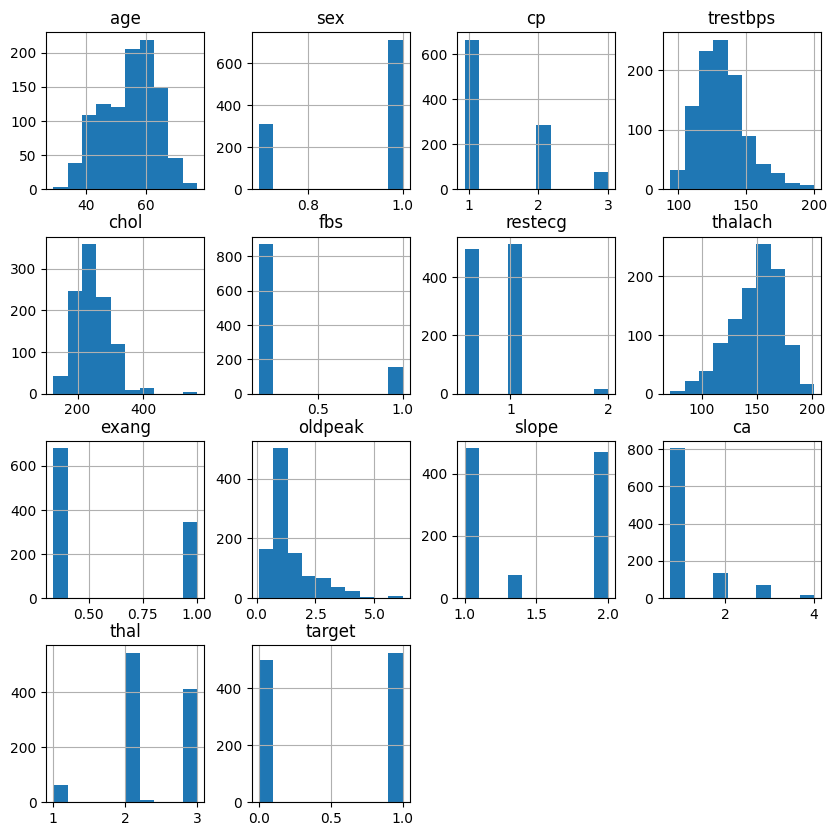

In [ ]:
df.hist(bins=10,figsize=(10,10))
plt.show()

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='sex', ylabel='age'>,
        <Axes: xlabel='cp', ylabel='age'>,
        <Axes: xlabel='trestbps', ylabel='age'>,
        <Axes: xlabel='chol', ylabel='age'>,
        <Axes: xlabel='fbs', ylabel='age'>,
        <Axes: xlabel='restecg', ylabel='age'>,
        <Axes: xlabel='thalach', ylabel='age'>,
        <Axes: xlabel='exang', ylabel='age'>,
        <Axes: xlabel='oldpeak', ylabel='age'>,
        <Axes: xlabel='slope', ylabel='age'>,
        <Axes: xlabel='ca', ylabel='age'>,
        <Axes: xlabel='thal', ylabel='age'>,
        <Axes: xlabel='target', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='sex'>,
        <Axes: xlabel='sex', ylabel='sex'>,
        <Axes: xlabel='cp', ylabel='sex'>,
        <Axes: xlabel='trestbps', ylabel='sex'>,
        <Axes: xlabel='chol', ylabel='sex'>,
        <Axes: xlabel='fbs', ylabel='sex'>,
        <Axes: xlabel='restecg', ylabel='sex'>,
        <Axes: xlabel='thalach', ylabel='s

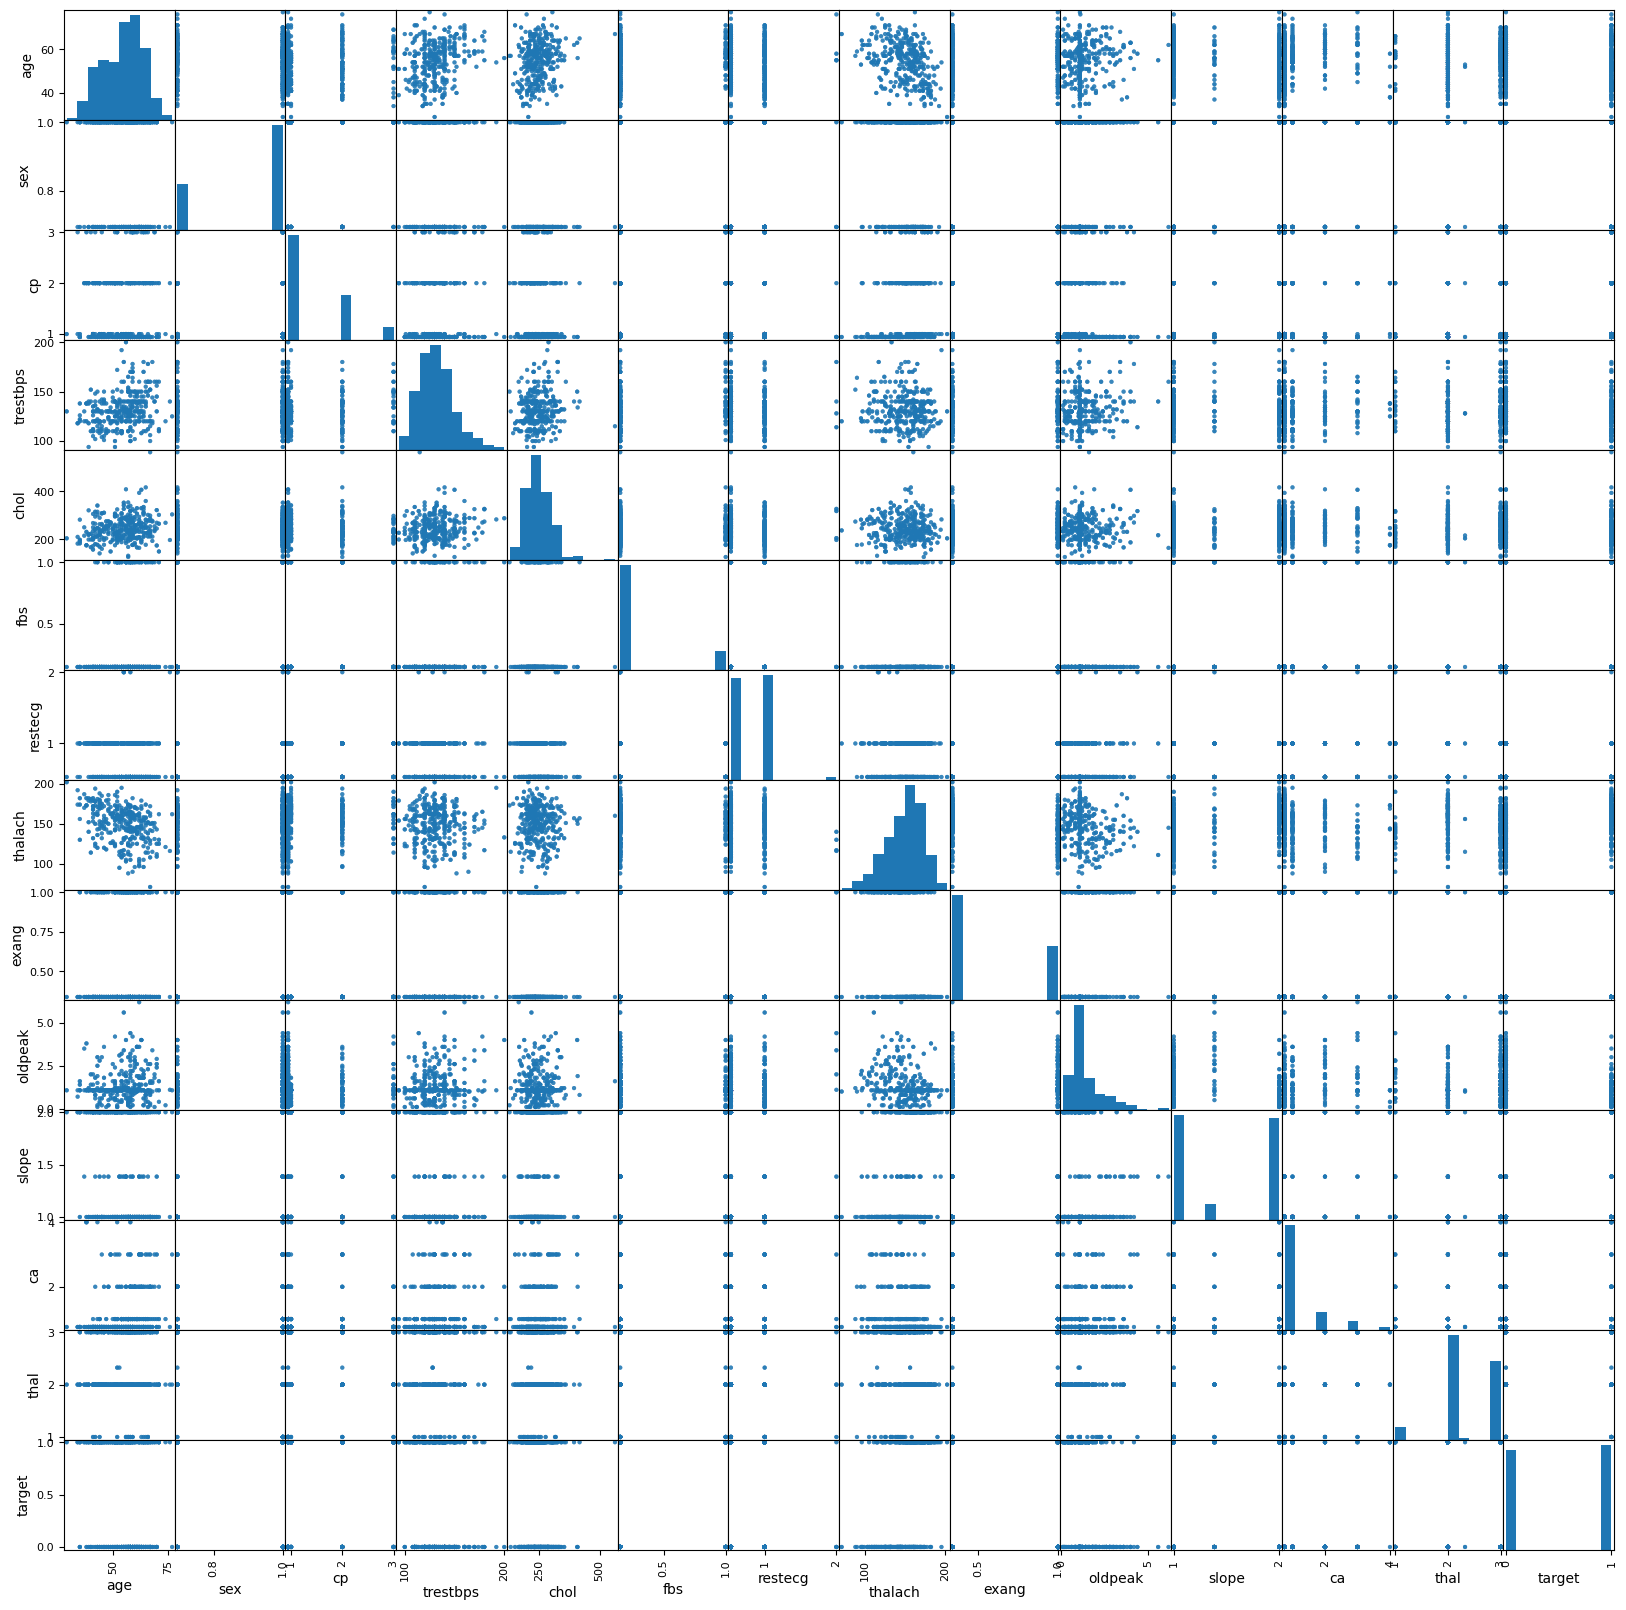

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(20,20))

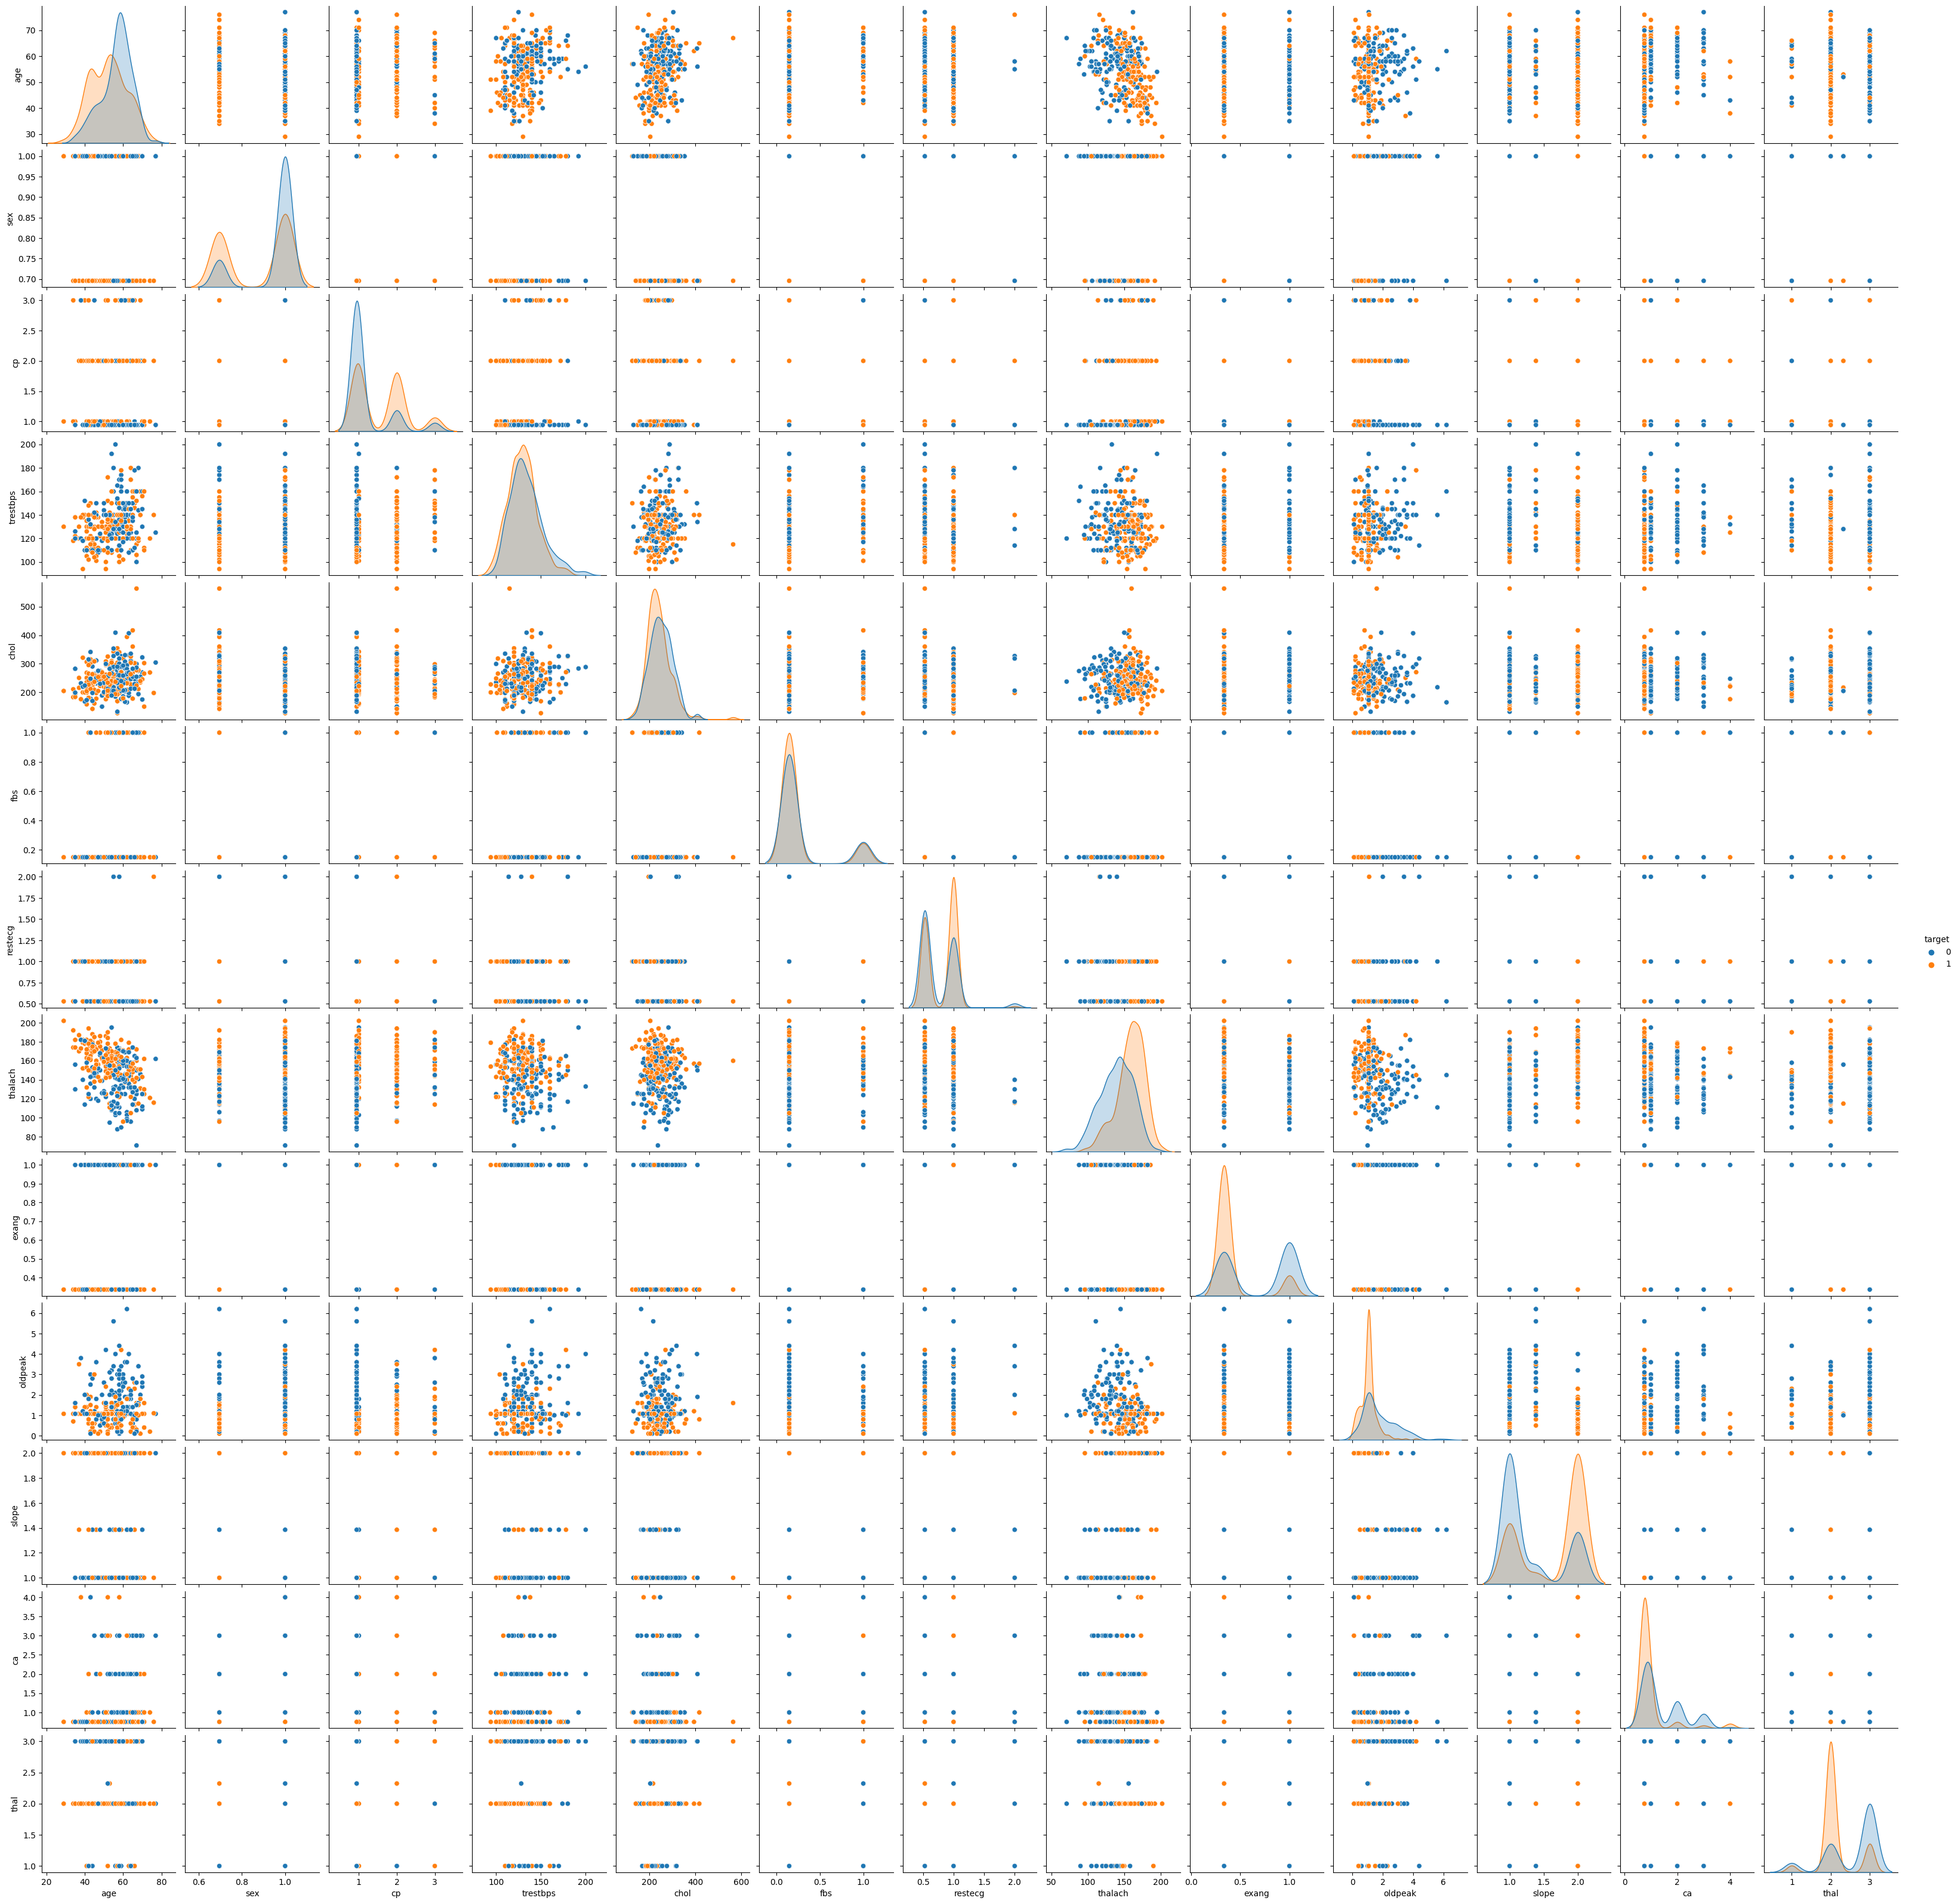

In [ ]:
sns.pairplot(data=df, hue = 'target')
plt.show()

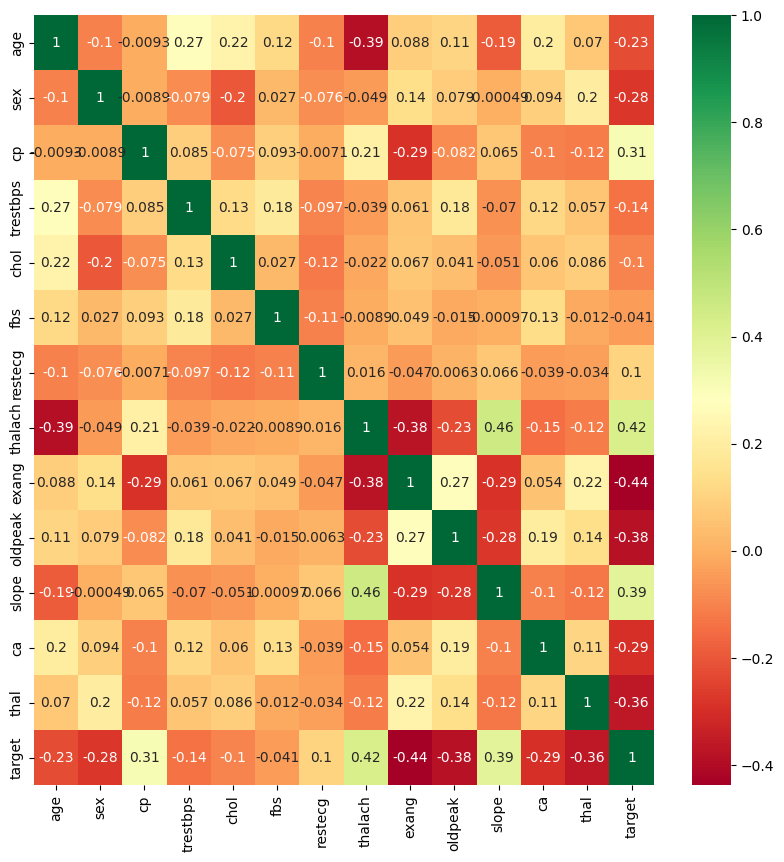

In [ ]:
import seaborn as sns
corrmat = df.corr()
top_corr_features= corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")


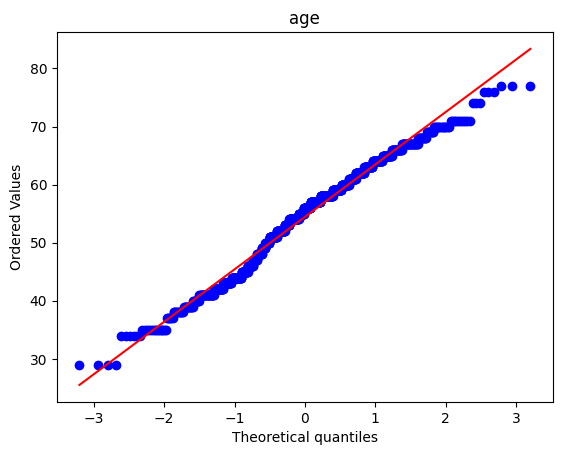

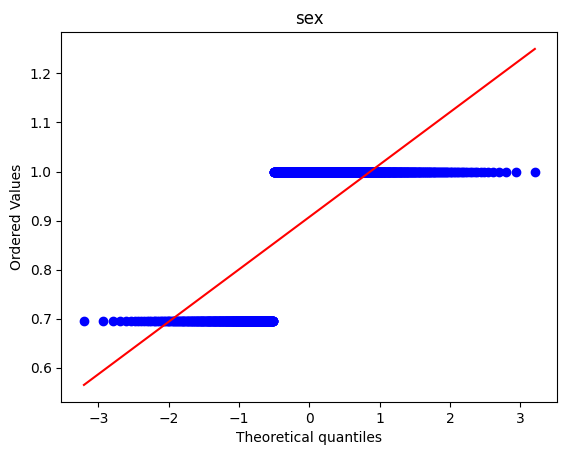

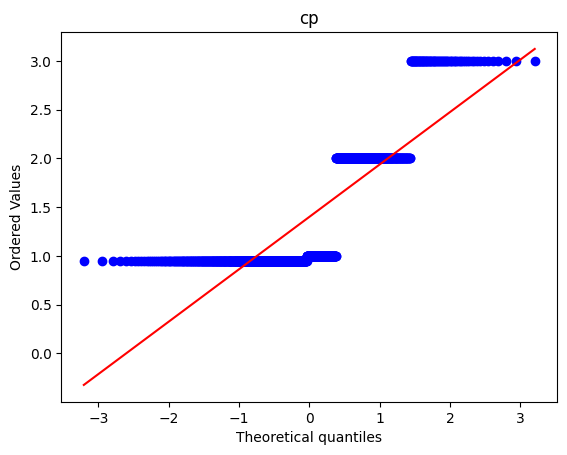

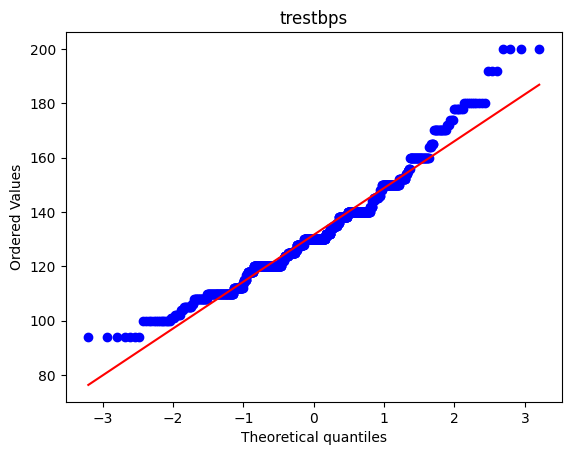

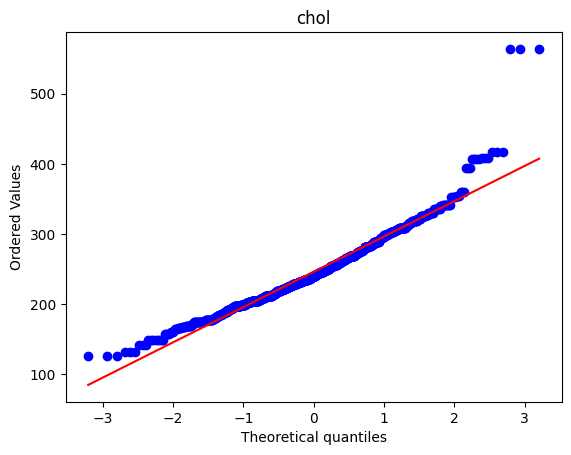

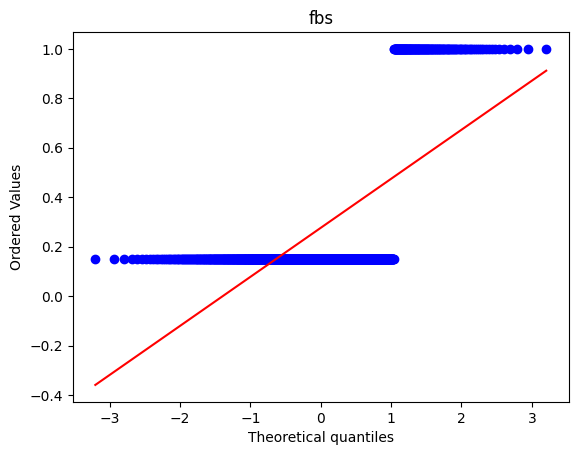

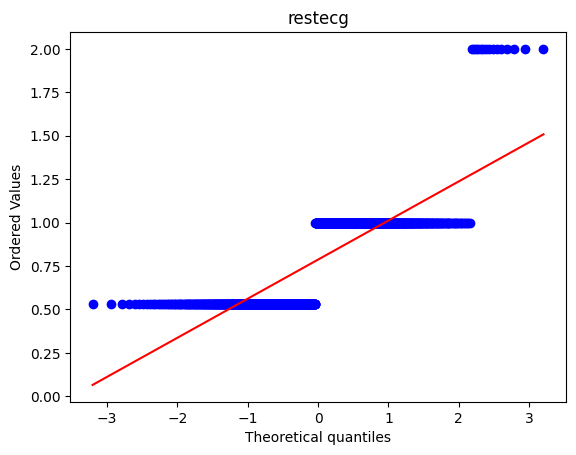

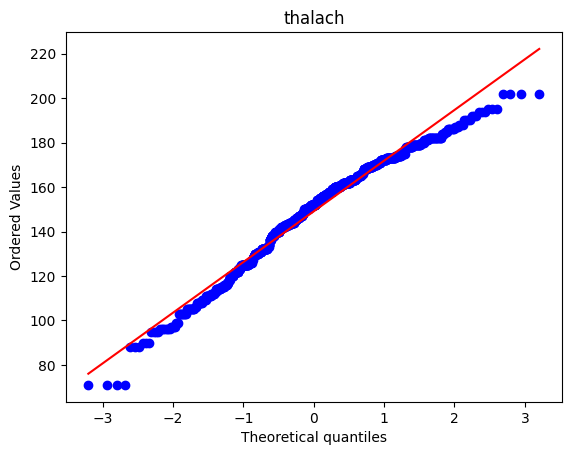

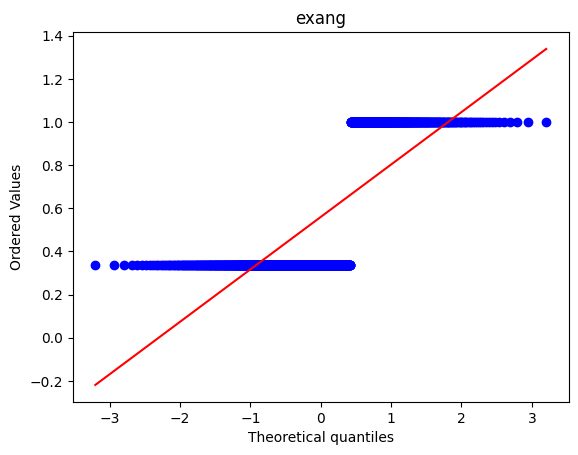

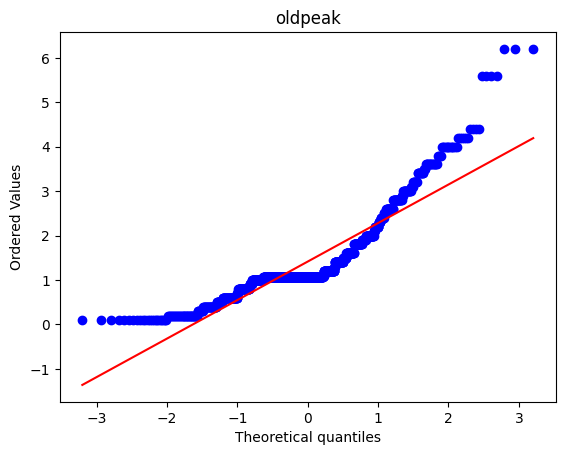

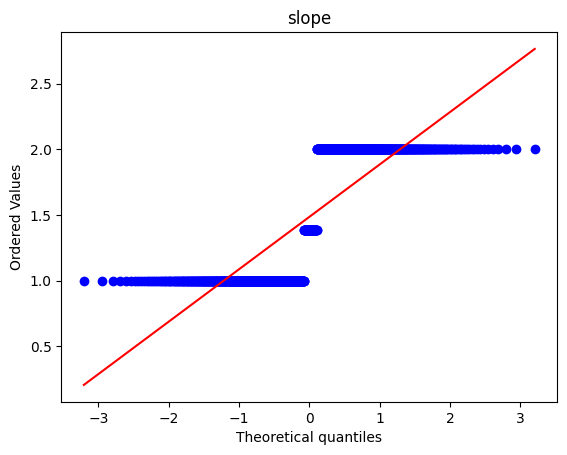

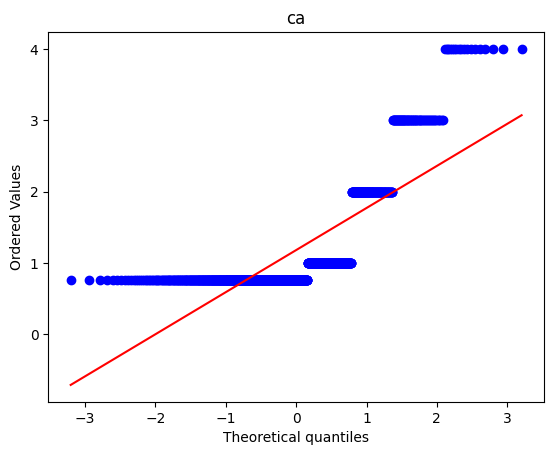

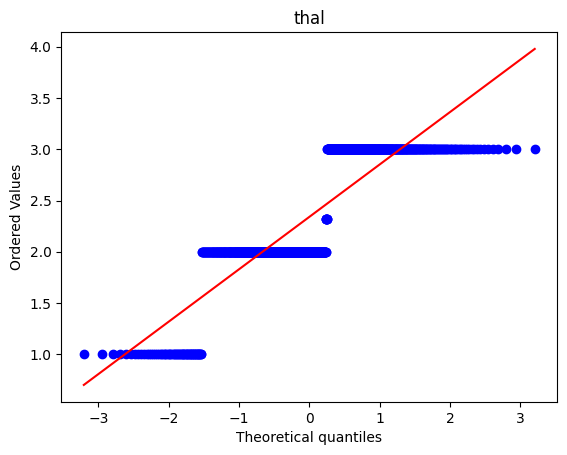

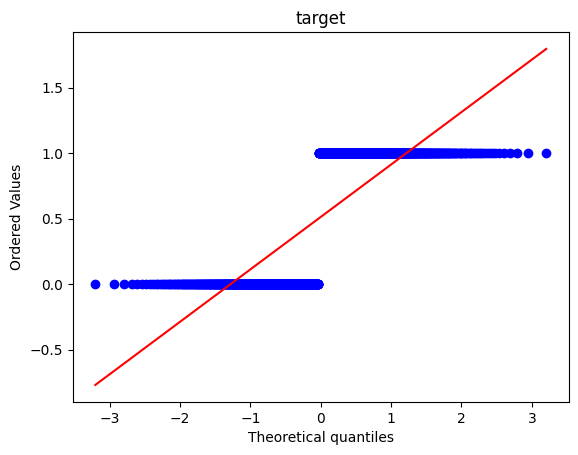

In [ ]:
from scipy import stats
for feature in df.columns:
    stats.probplot(df[feature], plot = plt)
    plt.title(feature)
    plt.show()

In [ ]:
target_name="target"

#separate object for target feature
y=df[target_name]

x=df.drop(target_name,axis=1)

In [ ]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1.00000,0.942439,125,212,0.149268,1.000000,168,0.336585,1.000000,2.000000,2.000000,3.0
1,53,1.00000,0.942439,140,203,1.000000,0.529756,155,1.000000,3.100000,1.385366,0.754146,3.0
2,70,1.00000,0.942439,145,174,0.149268,1.000000,125,1.000000,2.600000,1.385366,0.754146,3.0
3,61,1.00000,0.942439,148,203,0.149268,1.000000,161,0.336585,1.071512,2.000000,1.000000,3.0
4,62,0.69561,0.942439,138,294,1.000000,1.000000,106,0.336585,1.900000,1.000000,3.000000,2.0


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

**SCALING TECHNIQUE**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(x)
SSX=scaler.transform(x)
print(x)


      age      sex        cp  trestbps  chol       fbs   restecg  thalach  \
0      52  1.00000  0.942439       125   212  0.149268  1.000000      168   
1      53  1.00000  0.942439       140   203  1.000000  0.529756      155   
2      70  1.00000  0.942439       145   174  0.149268  1.000000      125   
3      61  1.00000  0.942439       148   203  0.149268  1.000000      161   
4      62  0.69561  0.942439       138   294  1.000000  1.000000      106   
...   ...      ...       ...       ...   ...       ...       ...      ...   
1020   59  1.00000  1.000000       140   221  0.149268  1.000000      164   
1021   60  1.00000  0.942439       125   258  0.149268  0.529756      141   
1022   47  1.00000  0.942439       110   275  0.149268  0.529756      118   
1023   50  0.69561  0.942439       110   254  0.149268  0.529756      159   
1024   54  1.00000  0.942439       120   188  0.149268  1.000000      113   

         exang   oldpeak     slope        ca  thal  
0     0.336585  1.0000

**TRAIN AND TEST DATA**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(SSX, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(686, 13) (339, 13) (686,) (339,)


**Building classification algorithm**

**1. Logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression(solver='liblinear', multi_class='ovr')
lr.fit(X_train,Y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

**2. KNN Algorithm**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

**3.Naive Bayes Classifier**



In [ ]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_train, Y_train)  

GaussianNB()

**4. Support Vector Machine**

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
svmclassifier = SVC()  
svmclassifier.fit(X_train, Y_train)  

SVC()

**5.Decision Tree** 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

**6. Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier  
randomclassifier= RandomForestClassifier(criterion="entropy")  
randomclassifier.fit(X_train, Y_train)  

RandomForestClassifier(criterion='entropy')

**Make Prediction**

In [ ]:
# print(lr_pred.shape)
# print(Y_test.shape)
# print(X_train.shape)

In [ ]:
lr_pred=lr.predict(X_test)

In [ ]:
knn_pred=knn.predict(X_test)

In [ ]:
svmclassifier_pred=svmclassifier.predict(X_test)

In [ ]:
classifier_pred=classifier.predict(X_test)

In [ ]:
dt_pred=dt.predict(X_test)

In [ ]:
randomclassifier_pred=randomclassifier.predict(X_test)

**Model Evaluation step**

In [ ]:
from sklearn.metrics import accuracy_score
print("Training accuracy of Logistic regression ",lr.score(X_train,Y_train))
print("Accuracy(Test) score of Logistic regression " , lr.score(X_test,Y_test))
print("Accuracy score of Logistic regression  ",accuracy_score(Y_test,lr_pred))

Training accuracy of Logistic regression  0.8425655976676385
Accuracy(Test) score of Logistic regression  0.8141592920353983
Accuracy score of Logistic regression   0.8141592920353983


In [ ]:
from sklearn.metrics import accuracy_score
print("Training accuracy of KNN ",knn.score(X_train,Y_train))
print("Accuracy(Test) score of KNN " , knn.score(X_test,Y_test))
print("Accuracy score of KNN ",accuracy_score(Y_test,knn_pred))

Training accuracy of KNN  0.9198250728862973
Accuracy(Test) score of KNN  0.8230088495575221
Accuracy score of KNN  0.8230088495575221


In [ ]:
from sklearn.metrics import accuracy_score
print("Training accuracy of SVM classifier ",svmclassifier.score(X_train,Y_train))
print("Accuracy(Test) score of SVM classifier " , svmclassifier.score(X_test,Y_test))
print("Accuracy score of SVM classifier ",accuracy_score(Y_test,svmclassifier_pred))

Training accuracy of SVM classifier  0.9329446064139941
Accuracy(Test) score of SVM classifier  0.8997050147492626
Accuracy score of SVM classifier  0.8997050147492626


In [ ]:
from sklearn.metrics import accuracy_score
print("Training accuracy of Naive Bayes classifier ",classifier.score(X_train,Y_train))
print("Accuracy(Test) score of Naive Bayes classifier" , classifier.score(X_test,Y_test))
print("Accuracy score of Naive Bayes classifier  ",accuracy_score(Y_test,classifier_pred))

Training accuracy of Naive Bayes classifier  0.8367346938775511
Accuracy(Test) score of Naive Bayes classifier 0.7935103244837758
Accuracy score of Naive Bayes classifier   0.7935103244837758


In [ ]:
from sklearn.metrics import accuracy_score
print("Training accuracy of Naive Bayes classifier ",dt.score(X_train,Y_train))
print("Accuracy(Test) score of Naive Bayes classifier" , dt.score(X_test,Y_test))
print("Accuracy score of Naive Bayes classifier  ",accuracy_score(Y_test,dt_pred))

Training accuracy of Naive Bayes classifier  1.0
Accuracy(Test) score of Naive Bayes classifier 0.9911504424778761
Accuracy score of Naive Bayes classifier   0.9911504424778761


In [ ]:
from sklearn.metrics import accuracy_score
print("Training accuracy of random forest classifier ",randomclassifier.score(X_train,Y_train))
print("Accuracy(Test) score of random forest classifier" , randomclassifier.score(X_test,Y_test))
print("Accuracy score of random forest classifier ",accuracy_score(Y_test,randomclassifier_pred))

Training accuracy of random forest classifier  1.0
Accuracy(Test) score of random forest classifier 0.9882005899705014
Accuracy score of random forest classifier  0.9882005899705014


In [ ]:
#From the above comparison, we can observe that Naive Bayes gets the highest accuracy of 99.1 %

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
cm=confusion_matrix(Y_test,lr_pred) 
cm

array([[131,  45],
       [ 18, 145]])

<Axes: >

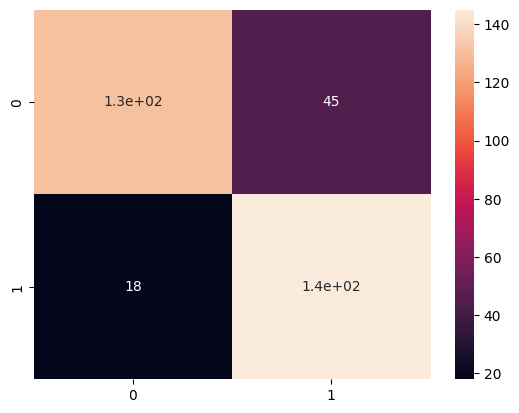

In [ ]:
sns.heatmap(pd.DataFrame(cm), annot=True)

In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, classifier_pred))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79       176
           1       0.75      0.87      0.80       163

    accuracy                           0.79       339
   macro avg       0.80      0.80      0.79       339
weighted avg       0.80      0.79      0.79       339



In [ ]:
# input_data = (7,159,64,0,0,27.4,0.294,40)

# # changing the input_data to numpy array
# input_data_as_numpy_array = np.asarray(input_data)

# # reshape the array as we are predicting for one instance
# input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# prediction = svmclassifier.predict(input_data_reshaped)
# print(prediction)

# if (prediction[0] == 0):
#   print('The person is not diabetic')
# else:
#   print('The person is diabetic')

In [ ]:
import pickle
filename = 'heart_pickle_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
model = open('heart_pickle_model.pkl','rb')
loadedmodel = pickle.load(model)

In [ ]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loadedmodel.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease
